In [1]:
# Librerias
import pandas as pd
import requests
import urllib.parse
from scipy.stats import shapiro
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import plotly.express as px
import plotly.graph_objects as go


In [2]:
# Conecto con la API de datos del gobierno Argentino para obtener algunos datos
def get_api_call(ids, **kwargs):
    API_BASE_URL = "https://apis.datos.gob.ar/series/api/"
    kwargs["ids"] = ",".join(ids)
    return "{}{}?{}".format(API_BASE_URL, "series", urllib.parse.urlencode(kwargs))

In [3]:
# Llamo a la api con los datos necesarios a analizar
variables = pd.read_csv(get_api_call(
    ["168.1_T_CAMBIOR_D_0_0_26","168.1_T_CAMBIOR_D_0_0_26:percent_change",
    "149.1_SOR_PRIADO_OCTU_0_28","149.1_TL_INDIIOS_OCTU_0_21","149.1_TL_REGIADO_OCTU_0_16",
    "149.1_SOR_PRIADO_OCTU_0_28:percent_change","149.1_TL_INDIIOS_OCTU_0_21:percent_change",
    "149.1_TL_REGIADO_OCTU_0_16:percent_change","101.1_I2NG_2016_M_22",
    "101.1_I2NG_2016_M_22:percent_change","103.1_I2R_2016_M_18","103.1_I2R_2016_M_18:percent_change"
    ],
    format="csv", start_date=2016
))

In [ ]:
variables.head() #Vemos la informacion

,indice_tiempo,tipo_cambio_bna_vendedor,tipo_cambio_bna_vendedor_var_pct_var_pct_var_pct_var_pct_var_pct_var_pct,indice_salarios_no_registrado_sector_privado,indice_salarios,indice_salarios_registrado,indice_salarios_no_registrado_sector_privado.1,indice_salarios.1,indice_salarios_registrado.1,ipc_2016_nivel_general,ipc_2016_nivel_general.1,ipc_2016_regulados,ipc_2016_regulados.1
0,2016-01-01,13.770968,NaN,NaN,NaN,78.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-02-01,14.927586,0.083990,NaN,NaN,79.42,NaN,NaN,0.013269,NaN,NaN,NaN,NaN
2,2016-03-01,15.117742,0.012739,NaN,NaN,81.92,NaN,NaN,0.031478,NaN,NaN,NaN,NaN
3,2016-04-01,14.623333,-0.032704,NaN,NaN,85.30,NaN,NaN,0.041260,85.5254,NaN,84.0036,NaN
4,2016-05-01,14.329032,-0.020125,NaN,NaN,88.13,NaN,NaN,0.033177,89.1118,0.041934,91.3453,0.087397


In [ ]:
variables.isnull().sum() #Chequeamos nulos

indice_tiempo                                                                0
tipo_cambio_bna_vendedor                                                     0
tipo_cambio_bna_vendedor_var_pct_var_pct_var_pct_var_pct_var_pct_var_pct     1
indice_salarios_no_registrado_sector_privado                                10
indice_salarios                                                             10
indice_salarios_registrado                                                   1
indice_salarios_no_registrado_sector_privado.1                              11
indice_salarios.1                                                           11
indice_salarios_registrado.1                                                 2
ipc_2016_nivel_general                                                       3
ipc_2016_nivel_general.1                                                     4
ipc_2016_regulados                                                           3
ipc_2016_regulados.1                                

In [ ]:
variables.columns

Index(['indice_tiempo', 'tipo_cambio_bna_vendedor',
       'tipo_cambio_bna_vendedor_var_pct_var_pct_var_pct_var_pct_var_pct_var_pct',
       'indice_salarios_no_registrado_sector_privado', 'indice_salarios',
       'indice_salarios_registrado',
       'indice_salarios_no_registrado_sector_privado.1', 'indice_salarios.1',
       'indice_salarios_registrado.1', 'ipc_2016_nivel_general',
       'ipc_2016_nivel_general.1', 'ipc_2016_regulados',
       'ipc_2016_regulados.1'],
      dtype='object')

In [ ]:
sin_tiempo = variables.loc[:,'tipo_cambio_bna_vendedor':]

In [ ]:
varib = variables[['tipo_cambio_bna_vendedor',
       'indice_salarios_no_registrado_sector_privado', 'indice_salarios',
       'indice_salarios_registrado',
        "ipc_2016_nivel_general",
        'ipc_2016_regulados']]

In [ ]:
# Aplicamos el test de shapiro-wilks al dataset menos la columna de tiempo para ver si sigue una normal quitando los Nan
stat, p = shapiro(sin_tiempo.dropna())
print('stat=%.3f, p=%.5f' % (stat, p))
if p > 0.05:
	print('No podemos rechazar que provengan de una distribución Gaussiana')
else:
	print('No sigue una distribución Gaussiana')

stat=0.726, p=0.00000
No sigue una distribución Gaussiana


In [ ]:
# Hacemos lo mismo sin quitar los Nan
stat, p = shapiro(sin_tiempo)
print('stat=%.3f, p=%.5f' % (stat, p))
if p > 0.05:
	print('No podemos rechazar que provengan de una distribución Gaussiana')
else:
	print('No sigue una distribución Gaussiana')

stat=nan, p=1.00000
No podemos rechazar que provengan de una distribución Gaussiana


In [ ]:
# Pruebo con solo las variables que no estan en porcentaje sin Nan
stat, p = shapiro(varib.dropna())
print('stat=%.3f, p=%.5f' % (stat, p))
if p > 0.05:
	print('No podemos rechazar que provengan de una distribución Gaussiana')
else:
	print('No sigue una distribución Gaussiana')

stat=0.875, p=0.00000
No sigue una distribución Gaussiana


In [ ]:
# Hacemos lo mismo sin quitar los Nan
stat, p = shapiro(varib)
print('stat=%.3f, p=%.5f' % (stat, p))
if p > 0.05:
	print('No podemos rechazar que provengan de una distribución Gaussiana')
else:
	print('No sigue una distribución Gaussiana')

stat=nan, p=1.00000
No podemos rechazar que provengan de una distribución Gaussiana


In [ ]:
varib.isnull().sum()

tipo_cambio_bna_vendedor                         0
indice_salarios_no_registrado_sector_privado    10
indice_salarios                                 10
indice_salarios_registrado                       1
ipc_2016_nivel_general                           3
ipc_2016_regulados                               3
dtype: int64

C:\Users\Romina\AppData\Local\Temp\ipykernel_20576\417984151.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


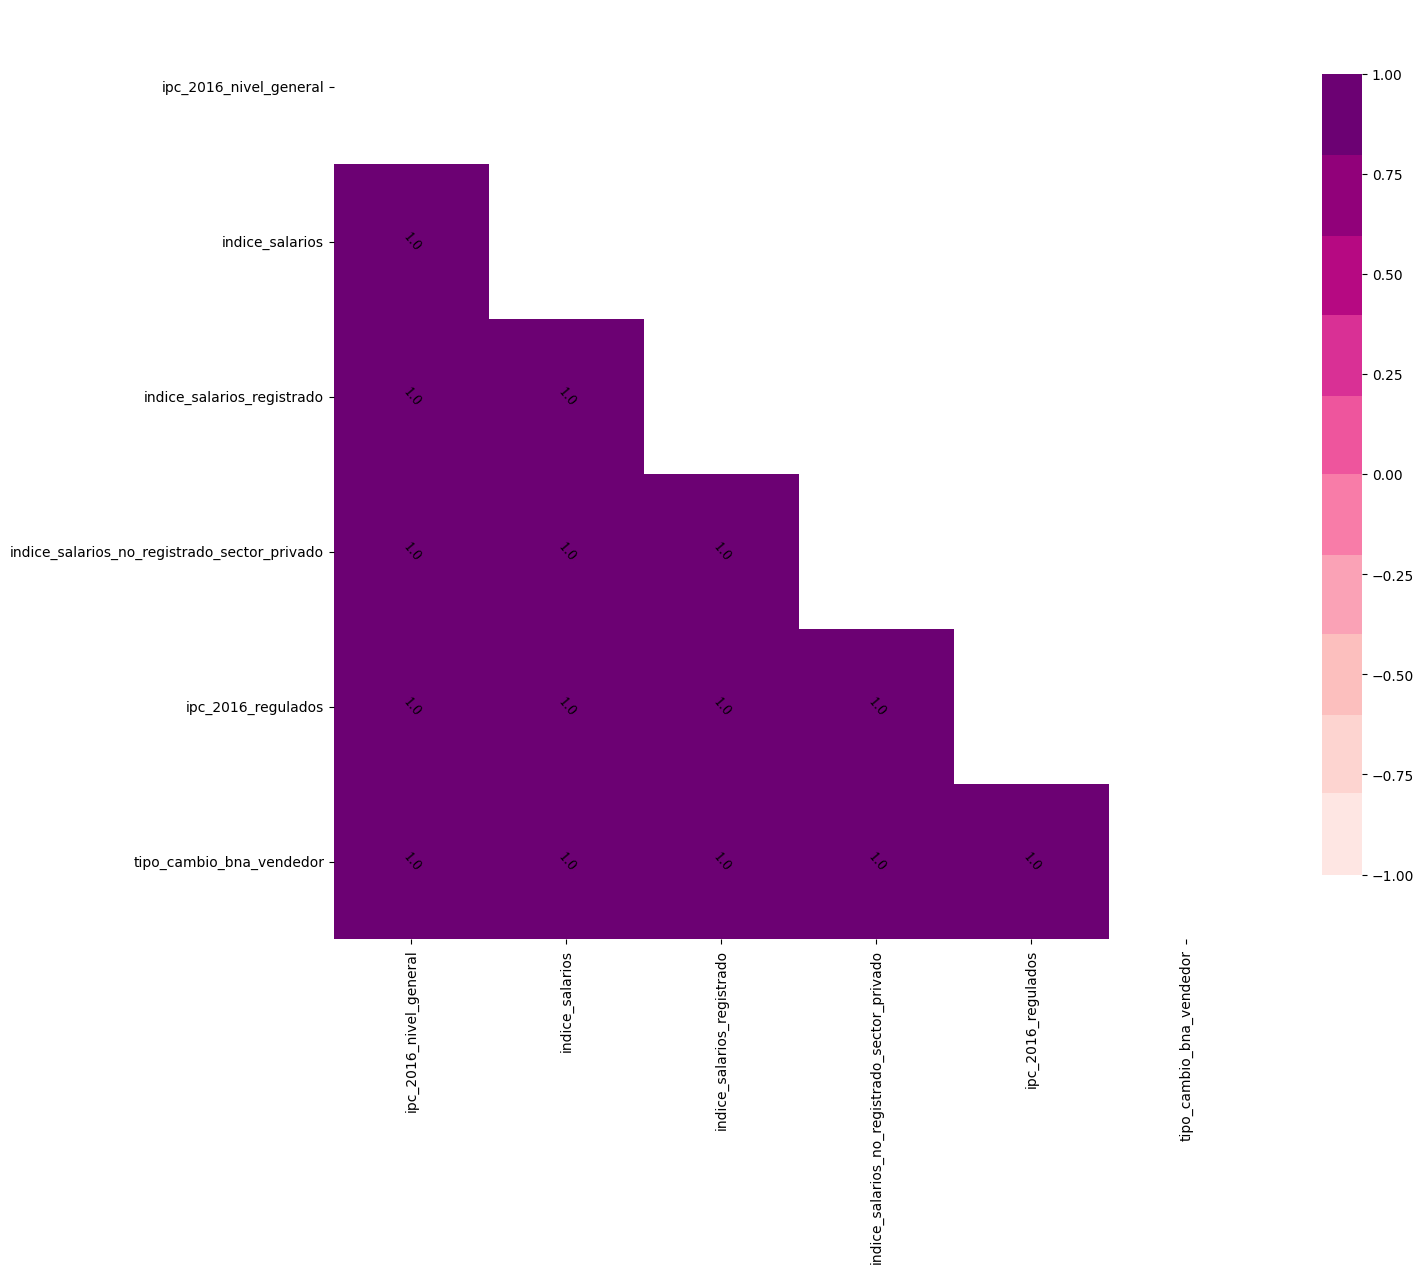

In [ ]:
corr = varib.dropna().corr(method = 'pearson').sort_values(by = 'ipc_2016_nivel_general', axis = 0, ascending = False).sort_values(by = 'ipc_2016_nivel_general', axis = 1, ascending = False)
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
 
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,13))
 
# Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
# cmap = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
cmap = sns.color_palette("RdPu", 10)
# sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr.iloc[0:37,0:37], mask=mask[0:37,0:37], cmap=cmap,vmin=-1, vmax=1, center=0,
            square=True, cbar_kws={"shrink": .8}, annot = True, fmt="0.1f", 
            annot_kws= {"fontsize": 9, 
            "fontfamily": "serif",
            "rotation": -50,
            "color":"black"}
            );

In [ ]:
varib.dropna().head()

,tipo_cambio_bna_vendedor,indice_salarios_no_registrado_sector_privado,indice_salarios,indice_salarios_registrado,ipc_2016_nivel_general,ipc_2016_regulados
9,15.387097,100.00,100.00,100.00,97.2428,97.2229
10,15.545000,100.73,101.41,101.58,98.8166,99.0540
11,16.050000,103.20,102.79,102.69,100.0000,100.0000
12,16.106452,102.00,104.38,104.98,101.3130,101.1274
13,15.782143,104.94,105.76,105.97,103.8085,106.3489


In [ ]:
varib2=varib.dropna()

In [ ]:
# Chequeamos pearson sin los nan porque es raro que todo este tan correlacionado.
stat, p = pearsonr(varib2["tipo_cambio_bna_vendedor"], varib2["indice_salarios_no_registrado_sector_privado"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente independientes')
else:
	print('Probablemente dependientes')

stat=0.975, p=0.000
Probablemente dependientes


## Primer variable "Salarios"

In [6]:
# Llamo a la api con otros datos
salarios = pd.read_csv(get_api_call(
    ["149.1_SOR_PRIADO_OCTU_0_28","149.1_TL_INDIIOS_OCTU_0_21","149.1_TL_REGIADO_OCTU_0_16","149.1_SOR_PRIADO_OCTU_0_28:percent_change",
    "149.1_TL_INDIIOS_OCTU_0_21:percent_change","149.1_TL_REGIADO_OCTU_0_16:percent_change",
    "101.1_I2NG_2016_M_22","101.1_I2NG_2016_M_22:percent_change"],
    format="csv", start_date=2016
))

In [7]:
salarios.head()

,indice_tiempo,indice_salarios_no_registrado_sector_privado,indice_salarios,indice_salarios_registrado,indice_salarios_no_registrado_sector_privado_var_pct_var_pct_var_pct_var_pct,indice_salarios.1,indice_salarios_registrado.1,ipc_2016_nivel_general,ipc_2016_nivel_general.1
0,2016-01-01,NaN,NaN,78.38,NaN,NaN,NaN,NaN,NaN
1,2016-02-01,NaN,NaN,79.42,NaN,NaN,0.013269,NaN,NaN
2,2016-03-01,NaN,NaN,81.92,NaN,NaN,0.031478,NaN,NaN
3,2016-04-01,NaN,NaN,85.30,NaN,NaN,0.041260,85.5254,NaN
4,2016-05-01,NaN,NaN,88.13,NaN,NaN,0.033177,89.1118,0.041934


In [8]:
salarios.columns[1:4]

Index(['indice_salarios_no_registrado_sector_privado', 'indice_salarios',
       'indice_salarios_registrado'],
      dtype='object')

In [10]:
# Renombro las columnas
nombres_columnas = {
    'indice_salarios_no_registrado_sector_privado': "Salarios no registrados",
    'indice_salarios':"Salarios general",
    'indice_salarios_registrado':"Salarios registrados",
    'indice_salarios_no_registrado_sector_privado_var_pct_var_pct_var_pct_var_pct': "Salarios no registrados(Var %)",
    'indice_salarios.1':"Salarios general(Var %)",
    'indice_salarios_registrado.1':"Salarios registrados(Var %)",
    'ipc_2016_nivel_general': "IPC general",
    'ipc_2016_nivel_general.1':"IPC general(Var %)"
    }
# Aplica la traducción utilizando el método rename
salarios.rename(columns=nombres_columnas, inplace=True)

In [11]:
fig = px.line(salarios, x="indice_tiempo", y=salarios.columns[1:4], title='Evolución de los salarios',  markers=True,
                    labels={"indice_tiempo":"","value":"Valores"}, template="plotly_dark")
annotations = []
# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Fuente: datos.gob.ar',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))
fig.update_layout(annotations=annotations)
fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()

In [12]:
salarios.columns

Index(['indice_tiempo', 'Salarios no registrados', 'Salarios general',
       'Salarios registrados', 'Salarios no registrados(Var %)',
       'Salarios general(Var %)', 'Salarios registrados(Var %)', 'IPC general',
       'IPC general(Var %)'],
      dtype='object')

In [13]:
fig = px.line(salarios, x="indice_tiempo", y=salarios.columns[4:7], title='Evolución de los salarios',  markers=True,
                    labels={"indice_tiempo":"","value":"Valores"}, template="plotly_dark")
annotations = []
# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Fuente: datos.gob.ar',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))
fig.update_layout(annotations=annotations)
fig.update_xaxes(
    rangeslider_visible=True
)
fig.show()

In [14]:
salarios.columns

Index(['indice_tiempo', 'Salarios no registrados', 'Salarios general',
       'Salarios registrados', 'Salarios no registrados(Var %)',
       'Salarios general(Var %)', 'Salarios registrados(Var %)', 'IPC general',
       'IPC general(Var %)'],
      dtype='object')

In [15]:
fig = px.histogram(salarios, x="indice_tiempo", y="Salarios general", histfunc="avg", title="Comparación evolución salarios vs IPC",
                    template="plotly_dark",labels={"indice_tiempo":"","avg of Salarios general":"Valores"})
fig.update_traces(xbins_size="M1", hovertemplate=None)
fig.update_xaxes(showgrid=True)
fig.update_layout(bargap=0.1)
fig.add_trace(go.Scatter(x=salarios["indice_tiempo"], y=salarios["IPC general"], name="IPC"))
fig.update_layout(hovermode="x unified")
annotations = []
# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Fuente: datos.gob.ar',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()

In [16]:
# Guardamos el csv
salarios.to_csv("salarios.csv")

## Segunda variable "Tipo de cambio real"

In [17]:
# Llamamos a la api con otros datos (Tipo de cambio)
tipo_de_cambio = pd.read_csv(get_api_call(
    ["168.1_T_CAMBIOR_D_0_0_26","168.1_T_CAMBIOR_D_0_0_26:percent_change",
    "101.1_I2NG_2016_M_22","101.1_I2NG_2016_M_22:percent_change"],
    format="csv", start_date=2016
))


In [18]:
# Llamamos a la api con otros datos (Tipo de cambio Real)
tipo_de_cambio2 = pd.read_csv(get_api_call(
    ["116.2_TCRMA_0_T_36","116.2_TCRMA_0_T_36:percent_change",
    "101.1_I2NG_2016_M_22","101.1_I2NG_2016_M_22:percent_change"],
    format="csv", start_date=2016
))

In [19]:
tipo_de_cambio2.head()

,indice_tiempo,tipo_cambio_real_multilateral_actual,tipo_cambio_real_multilateral_actual_var_pct_var_pct,ipc_2016_nivel_general,ipc_2016_nivel_general.1
0,2016-01-01,100.552147,NaN,NaN,NaN
1,2016-04-01,92.796803,-0.077128,88.830000,NaN
2,2016-07-01,93.054204,0.002774,94.218767,0.060664
3,2016-10-01,90.568133,-0.026716,98.686467,0.047418
4,2017-01-01,88.984336,-0.017487,103.794733,0.051763


In [20]:
tipo_de_cambio.head()

,indice_tiempo,tipo_cambio_bna_vendedor,tipo_cambio_bna_vendedor_var_pct_var_pct,ipc_2016_nivel_general,ipc_2016_nivel_general.1
0,2016-01-01,13.770968,NaN,NaN,NaN
1,2016-02-01,14.927586,0.083990,NaN,NaN
2,2016-03-01,15.117742,0.012739,NaN,NaN
3,2016-04-01,14.623333,-0.032704,85.5254,NaN
4,2016-05-01,14.329032,-0.020125,89.1118,0.041934


In [21]:
tipo_de_cambio.columns

Index(['indice_tiempo', 'tipo_cambio_bna_vendedor',
       'tipo_cambio_bna_vendedor_var_pct_var_pct', 'ipc_2016_nivel_general',
       'ipc_2016_nivel_general.1'],
      dtype='object')

In [22]:
# Renombro columnas
nombres_columnas = {
    'tipo_cambio_bna_vendedor': "Tipo de cambio",
    'tipo_cambio_bna_vendedor_var_pct_var_pct':"Tipo de cambio(Var %)",
    'ipc_2016_nivel_general': "IPC general",
    'ipc_2016_nivel_general.1':"IPC general(Var %)"
    }
# Aplica la traducción utilizando el método rename
tipo_de_cambio.rename(columns=nombres_columnas, inplace=True)

In [23]:
# Renombro columnas
nombres_columnas = {
    'tipo_cambio_real_multilateral_actual': "Tipo de cambio real multilateral",
    'tipo_cambio_real_multilateral_actual_var_pct_var_pct':"Tipo de cambio real multilateral(Var %)",
    'ipc_2016_nivel_general': "IPC general",
    'ipc_2016_nivel_general.1':"IPC general(Var %)"
    }
# Aplica la traducción utilizando el método rename
tipo_de_cambio2.rename(columns=nombres_columnas, inplace=True)

In [24]:
fig = px.histogram(tipo_de_cambio, x="indice_tiempo", y="Tipo de cambio", title="Comparación evolución tipo de cambio vs IPC",
                    template="plotly_dark",labels={"indice_tiempo":"","avg of Salarios general":"Valores"})
fig.update_traces(xbins_size="M1", hovertemplate=None)
fig.update_xaxes(showgrid=True)
fig.update_layout(bargap=0.1)
fig.add_trace(go.Scatter(x=tipo_de_cambio["indice_tiempo"], y=tipo_de_cambio["IPC general"], name="IPC"))
fig.update_layout(hovermode="x unified")
annotations = []
# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Fuente: datos.gob.ar',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()

In [25]:
fig = px.histogram(tipo_de_cambio, x="indice_tiempo", y="Tipo de cambio(Var %)", title="Comparación evolución tipo de cambio vs IPC (Variacion mensual)",
                    template="plotly_dark",labels={"indice_tiempo":""})
fig.update_traces(xbins_size="M1", hovertemplate=None)
fig.update_xaxes(showgrid=True)
fig.update_layout(bargap=0.1)
fig.add_trace(go.Scatter(x=tipo_de_cambio["indice_tiempo"], y=tipo_de_cambio["IPC general(Var %)"], name="IPC"))
fig.update_layout(hovermode="x unified")
annotations = []
# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Fuente: datos.gob.ar',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()

In [27]:
fig = px.histogram(tipo_de_cambio2, x="indice_tiempo", y="Tipo de cambio real multilateral", title="Comparación evolución tipo de cambio vs IPC",
                    template="plotly_dark",labels={"indice_tiempo":"","avg of Salarios general":"Valores"})
fig.update_traces(xbins_size="M1", hovertemplate=None)
fig.update_xaxes(showgrid=True)
fig.update_layout(bargap=0.1)
fig.add_trace(go.Scatter(x=tipo_de_cambio["indice_tiempo"], y=tipo_de_cambio["IPC general"], name="IPC"))
fig.update_layout(hovermode="x unified")
annotations = []
# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Fuente: datos.gob.ar',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

In [30]:
tipo_de_cambio2.columns

Index(['indice_tiempo', 'Tipo de cambio real multilateral',
       'Tipo de cambio real multilateral(Var %)', 'IPC general',
       'IPC general(Var %)'],
      dtype='object')

In [31]:
fig = px.histogram(tipo_de_cambio2, x="indice_tiempo", y="Tipo de cambio real multilateral(Var %)", title="Comparación evolución tipo de cambio vs IPC (Variacion mensual)",
                    template="plotly_dark",labels={"indice_tiempo":""})
fig.update_traces(xbins_size="M1", hovertemplate=None)
fig.update_xaxes(showgrid=True)
fig.update_layout(bargap=0.1)
fig.add_trace(go.Scatter(x=tipo_de_cambio2["indice_tiempo"], y=tipo_de_cambio2["IPC general(Var %)"], name="IPC"))
fig.update_layout(hovermode="x unified")
annotations = []
# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Fuente: datos.gob.ar',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))
fig.update_layout(annotations=annotations)

fig.show()

C:\Users\Romina\AppData\Local\Temp\ipykernel_21424\2648653669.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\Romina\AppData\Local\Temp\ipykernel_21424\2648653669.py:4: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



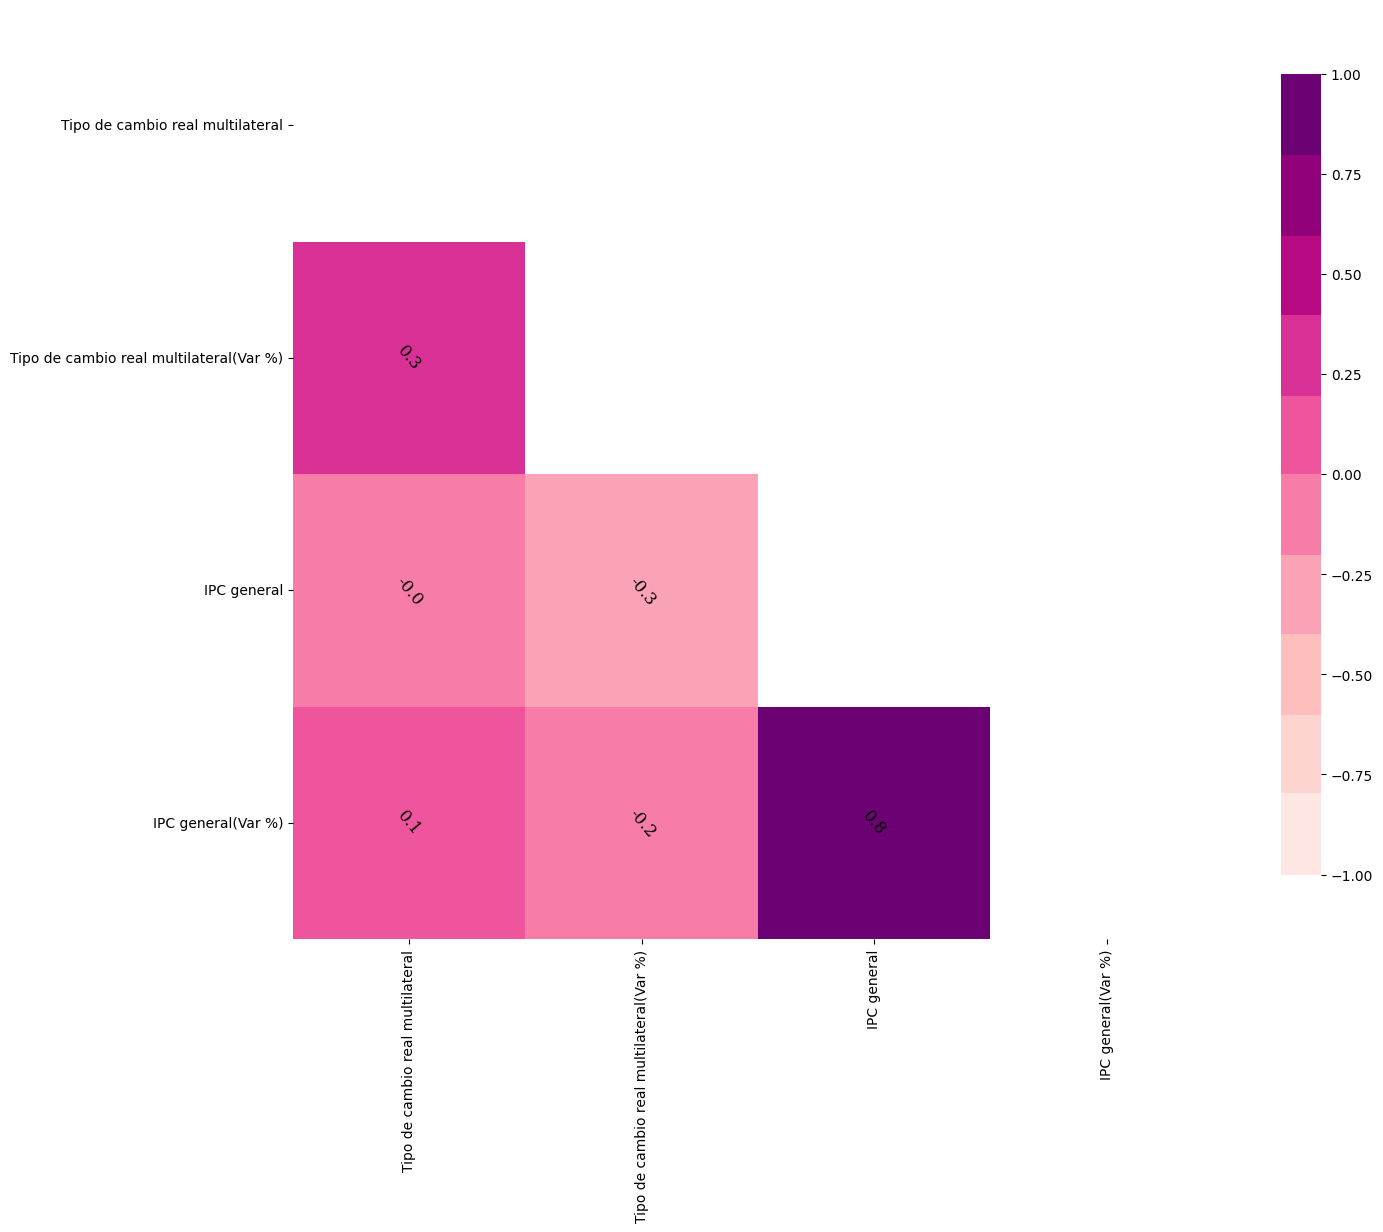

In [32]:
corr= tipo_de_cambio2.corr(method="pearson")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
 
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,13))
 
# Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)
# cmap = sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True)
cmap = sns.color_palette("RdPu", 10)
# sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr.iloc[0:37,0:37], mask=mask[0:37,0:37], cmap=cmap,vmin=-1, vmax=1, center=0,
            square=True, cbar_kws={"shrink": .8}, annot = True, fmt="0.1f", 
            annot_kws= {"fontsize": 12, 
            "fontfamily": "serif",
            "rotation": -50,
            "color":"black"}
            );

In [33]:
tipo_de_cambio_analisis=tipo_de_cambio2.dropna()

In [34]:
stat, p = pearsonr(tipo_de_cambio_analisis["Tipo de cambio real multilateral"], tipo_de_cambio_analisis["IPC general"])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probablemente independientes')
else:
	print('Probablemente dependientes')

stat=-0.078, p=0.706
Probablemente independientes


In [35]:
# Guardo el csv que voy a utilizar
tipo_de_cambio2.to_csv("tipo_de_cambio.csv")

In [36]:
tipo_de_cambio2.columns

Index(['indice_tiempo', 'Tipo de cambio real multilateral',
       'Tipo de cambio real multilateral(Var %)', 'IPC general',
       'IPC general(Var %)'],
      dtype='object')

## Tercera variable "Balanza comercial"

In [37]:
#Cargamos csv
balanza_comercial = pd.read_excel(r"C:\Users\Romina\Desktop\Rodri upgrade\Inflacion Argentina\Balanza comercial\balanmensual.xls")

In [38]:
balanza_comercial.head()

,Mes,Total mensual exp,Total acumulado exp,Total mensual imp,Total acumulado imp,Saldo
0,2016-01,3881,3881,4123,4123,-242
1,2016-02,4141,8022,4096,8219,45
2,2016-03,4421,12443,4556,12776,-135
3,2016-04,4740,17182,4423,17198,317
4,2016-05,5383,22566,4874,22072,510


In [39]:
gr = balanza_comercial[["Mes","Total mensual exp","Total mensual imp"]]

In [40]:
gr.columns

Index(['Mes', 'Total mensual exp', 'Total mensual imp'], dtype='object')

In [41]:
fig = px.line(gr, x="Mes", y=gr.columns[1:3], 
                    title='Evolución de la balanza comercial',  markers=True,
                    labels={"Mes":"","value":"Valores","variable":"","Total mensual exp": "Exportacion"}, template="plotly_dark")
annotations = []
# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Fuente: Indec',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))
fig.update_layout(annotations=annotations)
fig.update_layout(hovermode="x unified")
newnames = {'Total mensual exp':'Exportación', 'Total mensual imp': 'Importación'}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
                                      legendgroup = newnames[t.name],
                                      hovertemplate = None)
                                     )
fig.show()


## Cuarta variable "Balanza de pagos"

In [42]:
#Cargamos csv
balanza_pagos= pd.read_excel(r"C:\Users\Romina\Desktop\Rodri upgrade\Inflacion Argentina\Bal\Balanza pagos.xlsx")

In [43]:
balanza_pagos = balanza_pagos.transpose() #Transponemos el df

In [44]:
balanza_pagos.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
Año,1. Cuenta corriente,1.A Bienes y servicios,1.A.a Bienes,Crédito (Exportaciones),Débito (Importaciones),1.A.b Servicios,Crédito (Exportaciones),Débito (Importaciones),1.B Ingreso primario (Renta),1.B.1 Remuneración de empleados,...,Activos,Pasivos,3.3 Instrumentos financieros derivados,Activos,Pasivos,3.4 Otra inversión,Activos,Pasivos,3.5 Activos de reserva,Errores y omisiones netos
2016,-15104.786525,-4035.498244,4416.156942,57959.933691,53543.776749,-8451.655186,13424.706884,21876.36207,-12192.210741,-93.937831,...,797.839564,36053.133419,222.045038,0.0,-222.045038,8231.590543,2689.387169,-5542.203375,14311.235496,774.915755
2017,-31151.351751,-15142.5017,-5447.063108,58661.873552,64108.936659,-9695.438592,15506.201962,25201.640554,-16380.283706,-80.803522,...,5502.338284,41424.077775,-96.2256,0.0,96.2256,550.302881,12506.082997,11955.780116,14555.705524,-294.881463
2018,-27083.606451,-9678.495464,-743.227678,61801.002638,62544.230316,-8935.267786,15342.163178,24277.430964,-18650.230325,-79.455695,...,6166.701478,13090.626804,-32.108889,13.31652,45.425409,-22365.891101,25616.792289,47982.683389,11276.892777,-1063.289852
2019,-3492.479581,13390.550041,18233.723458,65162.061725,46928.338267,-4843.173417,14802.420805,19645.594222,-17732.164562,-92.888582,...,2104.372672,-5004.209054,-24.30033,-1.687512,22.612818,14297.470001,31253.206077,16955.736076,-21374.557268,-1910.733277


In [45]:
balanza_pagos.iloc[0]

0                                   1. Cuenta corriente
1                                1.A Bienes y servicios
2                                          1.A.a Bienes
3                               Crédito (Exportaciones)
4                                Débito (Importaciones)
5                                       1.A.b Servicios
6                               Crédito (Exportaciones)
7                                Débito (Importaciones)
8                          1.B Ingreso primario (Renta)
9                       1.B.1 Remuneración de empleados
10                                              Crédito
11                                               Débito
12                          1.B.2 Renta de la inversión
13                            1.B.2.1 Inversión directa
14                                     En el extranjero
15                                         En Argentina
16                         1.B.2.2 Inversión de cartera
17                                              

In [46]:
balanza_pagos.columns = balanza_pagos.iloc[0] #Utilizo una fila como nombre de las columnas

In [47]:
balanza_pagos.head()

Año,1. Cuenta corriente,1.A Bienes y servicios,1.A.a Bienes,Crédito (Exportaciones),Débito (Importaciones),1.A.b Servicios,Crédito (Exportaciones),Débito (Importaciones),1.B Ingreso primario (Renta),1.B.1 Remuneración de empleados,...,Activos,Pasivos,3.3 Instrumentos financieros derivados,Activos,Pasivos,3.4 Otra inversión,Activos,Pasivos,3.5 Activos de reserva,Errores y omisiones netos
Año,1. Cuenta corriente,1.A Bienes y servicios,1.A.a Bienes,Crédito (Exportaciones),Débito (Importaciones),1.A.b Servicios,Crédito (Exportaciones),Débito (Importaciones),1.B Ingreso primario (Renta),1.B.1 Remuneración de empleados,...,Activos,Pasivos,3.3 Instrumentos financieros derivados,Activos,Pasivos,3.4 Otra inversión,Activos,Pasivos,3.5 Activos de reserva,Errores y omisiones netos
2016,-15104.786525,-4035.498244,4416.156942,57959.933691,53543.776749,-8451.655186,13424.706884,21876.36207,-12192.210741,-93.937831,...,797.839564,36053.133419,222.045038,0.0,-222.045038,8231.590543,2689.387169,-5542.203375,14311.235496,774.915755
2017,-31151.351751,-15142.5017,-5447.063108,58661.873552,64108.936659,-9695.438592,15506.201962,25201.640554,-16380.283706,-80.803522,...,5502.338284,41424.077775,-96.2256,0.0,96.2256,550.302881,12506.082997,11955.780116,14555.705524,-294.881463
2018,-27083.606451,-9678.495464,-743.227678,61801.002638,62544.230316,-8935.267786,15342.163178,24277.430964,-18650.230325,-79.455695,...,6166.701478,13090.626804,-32.108889,13.31652,45.425409,-22365.891101,25616.792289,47982.683389,11276.892777,-1063.289852
2019,-3492.479581,13390.550041,18233.723458,65162.061725,46928.338267,-4843.173417,14802.420805,19645.594222,-17732.164562,-92.888582,...,2104.372672,-5004.209054,-24.30033,-1.687512,22.612818,14297.470001,31253.206077,16955.736076,-21374.557268,-1910.733277


In [48]:
balanza_pagos.drop("Año",axis=0,inplace=True) #Borro la fila

In [49]:
balanza_pagos.columns

Index(['1. Cuenta corriente', '1.A Bienes y servicios', '1.A.a Bienes',
       'Crédito (Exportaciones)', 'Débito (Importaciones)', '1.A.b Servicios',
       'Crédito (Exportaciones)', 'Débito (Importaciones)',
       '1.B Ingreso primario (Renta)', '1.B.1 Remuneración de empleados',
       'Crédito', 'Débito', '1.B.2 Renta de la inversión',
       '1.B.2.1 Inversión directa', 'En el extranjero', 'En Argentina',
       '1.B.2.2 Inversión de cartera', 'Crédito', 'Débito',
       '1.B.2.3 Otra inversión', 'Crédito', 'Débito',
       '1.B.2.4 Activos de reserva',
       '1.C.  Ingreso secundario (Transferencias corrientes)', 'Crédito',
       'Débito', '2. Cuenta de capital',
       'Capacidad/Necesidad de financiamiento', '3. Cuenta financiera',
       '3.1 Inversión directa', 'Activos', 'Pasivos',
       '3.2 Inversión de cartera', 'Activos ', 'Pasivos',
       '3.3 Instrumentos financieros derivados', 'Activos ', 'Pasivos',
       '3.4 Otra inversión', 'Activos ', 'Pasivos', '3.5 Activ

In [50]:
hd = balanza_pagos[['1. Cuenta corriente',"2. Cuenta de capital",'3. Cuenta financiera']]

In [51]:
hd.index

Index([2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype='object')

In [52]:
fig = px.line(hd, x=hd.index, y=hd.columns, 
                    title='Evolución de la balanza de pagos (principales variables)',  markers=True,
                    labels={"index":"","value":"Valores","Año":""}, template="plotly_dark")
annotations = []
# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Fuente: Indec',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))
fig.update_layout(annotations=annotations)
# fig.update_layout(hovermode="x unified")
# newnames = {'Total mensual exp':'Exportación', 'Total mensual imp': 'Importación'}
# fig.for_each_trace(lambda t: t.update(name = newnames[t.name],
#                                       legendgroup = newnames[t.name],
#                                       hovertemplate = None)
#                                      )
fig.show()

La balanza de pagos comprende la cuenta corriente, la cuenta de capital y la cuenta financiera.
La cuenta corriente brinda información de:
• El comercio de bienes y servicios, tanto exportaciones como importaciones.
• El ingreso primario, o los ingresos y egresos devengados provenientes de rentas (por ejemplo, cobros y pagos de intereses o remisión de utilidades).
• El ingreso secundario, o las transferencias corrientes (tales como las remesas).
Cuando la cuenta corriente arroja un resultado positivo se está en presencia de un superávit, mientras
que un saldo negativo constituye un déficit.
Por su parte, la cuenta de capital abarca las transferencias de capital (una donación de activos de
capital o las condonaciones o quitas de deuda, por ejemplo) y la adquisición o disposición de activos
no financieros no producidos.
Por último, la cuenta financiera comprende las transacciones de activos y pasivos financieros con
extranjeros (no residentes), distinguiendo el tipo funcional de inversión, es decir, inversión directa, de
cartera, derivados financieros, otra inversión y activos de reserva

In [53]:
fig = px.line(balanza_pagos, x=balanza_pagos.index, y='Capacidad/Necesidad de financiamiento', 
                    title='Evolución de la balanza de pagos (principales variables)',  markers=True,
                    labels={"index":"","value":"Valores","Año":""}, template="plotly_dark")
annotations = []
# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Fuente: Indec',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))
fig.update_layout(annotations=annotations)
fig.show()

El saldo de la cuenta corriente más el saldo de la cuenta de capital constituye lo que se denomina necesidad o capacidad de financiamiento: si el resultado de las transacciones por cuenta corriente y capital
entre residentes y no residentes es negativo, se estipula que el país tiene una necesidad de financiamiento, ya que debe existir alguna forma de cubrir dicho desbalance (por ejemplo, se tomó un préstamo del
exterior). Por el contrario, si el saldo es superavitario se estipula que el país tiene una capacidad de financiamiento, ya que se puede aplicar dicho excedente a otros fines (por ejemplo, se acumularon reservas
internacionales)

In [54]:
tipo_de_cambio2.columns

Index(['indice_tiempo', 'Tipo de cambio real multilateral',
       'Tipo de cambio real multilateral(Var %)', 'IPC general',
       'IPC general(Var %)'],
      dtype='object')

In [58]:
balanza_pagos.columns

Index(['1. Cuenta corriente', '1.A Bienes y servicios', '1.A.a Bienes',
       'Crédito (Exportaciones)', 'Débito (Importaciones)', '1.A.b Servicios',
       'Crédito (Exportaciones)', 'Débito (Importaciones)',
       '1.B Ingreso primario (Renta)', '1.B.1 Remuneración de empleados',
       'Crédito', 'Débito', '1.B.2 Renta de la inversión',
       '1.B.2.1 Inversión directa', 'En el extranjero', 'En Argentina',
       '1.B.2.2 Inversión de cartera', 'Crédito', 'Débito',
       '1.B.2.3 Otra inversión', 'Crédito', 'Débito',
       '1.B.2.4 Activos de reserva',
       '1.C.  Ingreso secundario (Transferencias corrientes)', 'Crédito',
       'Débito', '2. Cuenta de capital',
       'Capacidad/Necesidad de financiamiento', '3. Cuenta financiera',
       '3.1 Inversión directa', 'Activos', 'Pasivos',
       '3.2 Inversión de cartera', 'Activos ', 'Pasivos',
       '3.3 Instrumentos financieros derivados', 'Activos ', 'Pasivos',
       '3.4 Otra inversión', 'Activos ', 'Pasivos', '3.5 Activ

In [57]:
fig = px.histogram(balanza_pagos, x=balanza_pagos.index, y='Capacidad/Necesidad de financiamiento', 
                   title="Balanza de pagos",
                    template="plotly_dark",labels={"index":"","Capacidad/Necesidad de financiamiento":"Valores"})
fig.update_traces(xbins_size="M1", hovertemplate=None)
fig.update_xaxes(showgrid=True)
fig.update_layout(bargap=0.1)
annotations = []
# Source
annotations.append(dict(xref='paper', yref='paper', x=0.5, y=-0.1,
                              xanchor='center', yanchor='top',
                              text='Fuente: datos.gob.ar',
                              font=dict(family='Arial',
                                        size=12,
                                        color='rgb(150,150,150)'),
                              showarrow=False))
fig.update_layout(annotations=annotations)
fig.show()

In [59]:
# Guardo el csv para luego utilizar
balanza_pagos.to_csv(r"balanza_pagos.csv")